# 결정트리(Decision Tree)

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 모델 시각화

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf, out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

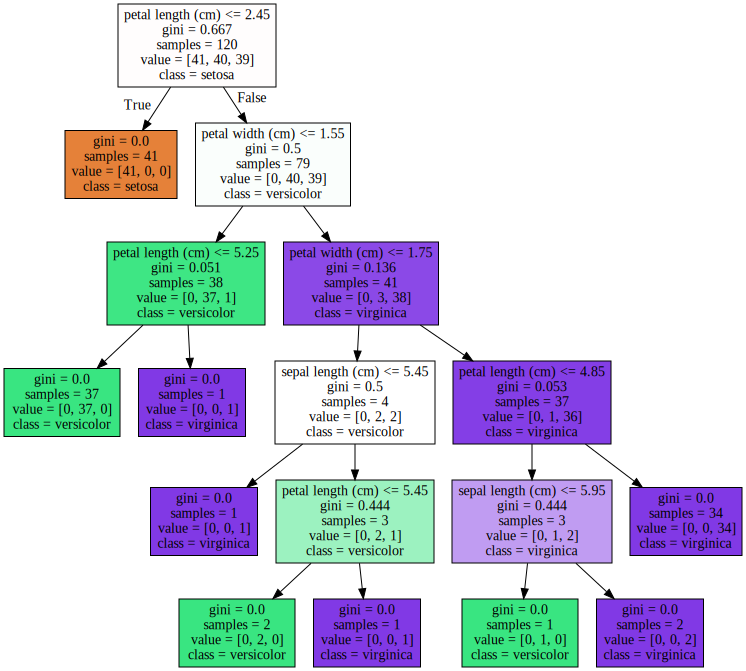

In [19]:
import graphviz

with open('tree.dot','r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# or

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=14.12)
plot_tree(dt_clf, filled=True, class_names=iris.target_names,feature_names=iris.feature_names)

TypeError: from_bounds() argument after * must be an iterable, not float

### 제약조건 

- max_depth = 3 인 경우

In [21]:
dt_clf2 = DecisionTreeClassifier(max_depth=3,random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

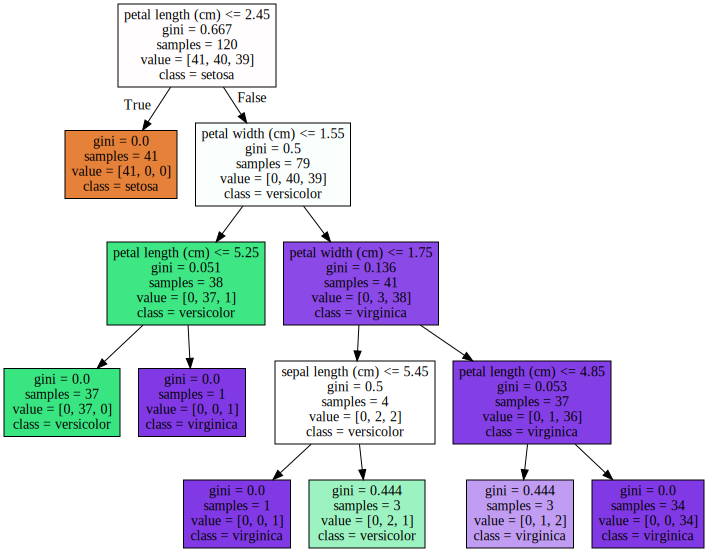

In [29]:
export_graphviz(
    dt_clf2, out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

with open('tree.dot','r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
from sklearn.metrics import accuracy_score
pred2 = dt_clf.predict(X_test)
accuracy_score(y_test, pred2)

0.9333333333333333

- min_sample_split = 4 인 경우

In [30]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4,random_state=156)
dt_clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

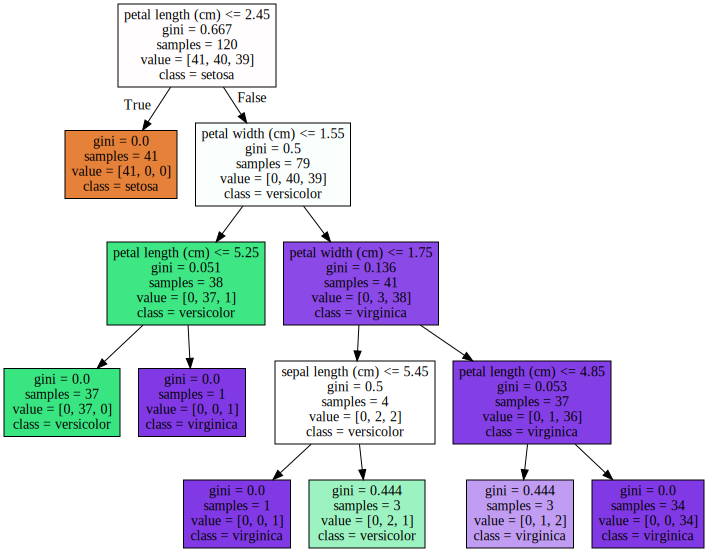

In [31]:
export_graphviz(
    dt_clf3, out_file='tree.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True, filled=True
)

with open('tree.dot','r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [32]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, pred3)

0.9333333333333333

### Feature Importance 

In [39]:
import seaborn as sns

In [40]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

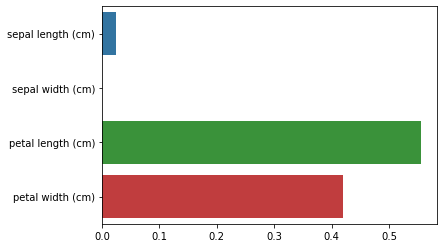

In [42]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)
plt.show()